In [1]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
import csv
import pandas as pd
#import timeit

# sorting algorithms

In [2]:
def insert_sort(a):
    for i in range(len(a)):
        cur_value = a[i]
        j = i-1
        while j >= 0 and a[j] > cur_value:
            a[j+1] = a[j]
            j = j-1
        a[j+1] = cur_value
    return a

In [3]:
def merge_sort(a):
    a = list(a)
    lenA= len(a)
    half_len = int(lenA/2)
    if len(a) <= 1:
        return a
    left = a[:half_len]
    right = a[half_len:]
    return merge(merge_sort(left), merge_sort(right))
def merge(a, b):
    result = []
    while a and b != []:
        if a[0] < b[0]:
            result.append(a[0])
            a.pop(0)
        else: 
            result.append(b[0])
            b.pop(0)
    result.extend(a)
    result.extend(b)
    return result

In [4]:
def quicksort(a):
    less = []
    equal = []
    greater = []
    if len(a) > 1:
        pivot = a[0]
        for x in a:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            elif x > pivot:
                greater.append(x)
        return quicksort(less)+equal+quicksort(greater)
    else:
        return a

In [10]:
def is_sorted(a):
    if all([a[i] <= a[i+1] for i in range(len(a)-1)]):
        return True
    return False

# funcoes auxiliares

In [11]:
def timer(t_init):
    t = datetime.now() - t_init
    t = t.seconds + t.microseconds*10**-6
    return t

In [12]:
def fill_list(mode, n):
    if mode == "random":
        result = np.random.randint(n, size=n)
    elif mode == "ascending":
        result = np.linspace(0,n,n)
    elif mode == "descending":
        result = np.linspace(n,0,n)
    result = [int(i) for i in result]
    return result

In [13]:
def get_cpp_data(type):
    file = 'c++outputs_'+'random'+'.csv'
    csv_reader = csv.reader(open(file), delimiter=',')
    line_count = 0
    headers = next(csv_reader, None)[:3]
    cpp_algorithms_dict = {h:[] for h in headers}
    for row in csv_reader:
        for h, v in list(zip(headers, row)):
            cpp_algorithms_dict[h].append(v)
    return cpp_algorithms_dict

In [22]:
def save_figure(data, sizes, order):
    N = len(sizes)
    legend = list(data.keys())
    #print(legend)
    
    fig, ax = plt.subplots(figsize=(10,10))
    
    
    ind = np.arange(N)
    width = 0.1
    
    values = list(data.values())
    bars_dict = {}
    for i in range(len(data)):
        p = "p"+str(i)
        #print(p)
        bars_dict[p] = ax.bar(ind+width*i, values[i], width)
    
    title = 'Runtime and algorithms ({} order)'.format(order)
    ax.set_title(title)
    ax.set_xticks(ind + width/2)
    ax.set_xticklabels(list(sizes))
    #ax.set_ylim([0, 20])
    
    ax.legend(bars_dict.values(), legend)
    ax.set_xlabel('List sizes')
    ax.set_ylabel('Runtime')
    ax.autoscale_view()
    
    fig_name = "runtime_comparison_{}.png".format(order)
    plt.savefig(fig_name)

In [21]:
def get_cpp_data(order):
    file = 'c++outputs_'+order+'.csv'
    print(file)
    csv_reader = csv.reader(open(file), delimiter=',')
    line_count = 0
    headers = next(csv_reader, None)[:3]
    cpp_dict = {h:[] for h in headers}
    for row in csv_reader:
        for h, v in list(zip(headers, row)):
            cpp_dict[h].append(float(v))
    return cpp_dict

# 4.1

In [203]:
z = {**cpp_algorithms_dict, **test}

random
270
540
810
1080
1350
1620
1890
2160
2430
2700
c++outputs_random.csv
random
ascending
270
540
810
1080
1350
1620
1890
2160
2430
2700
c++outputs_ascending.csv
ascending
descending
270
540
810
1080
1350
1620
1890
2160
2430
2700
c++outputs_descending.csv
descending


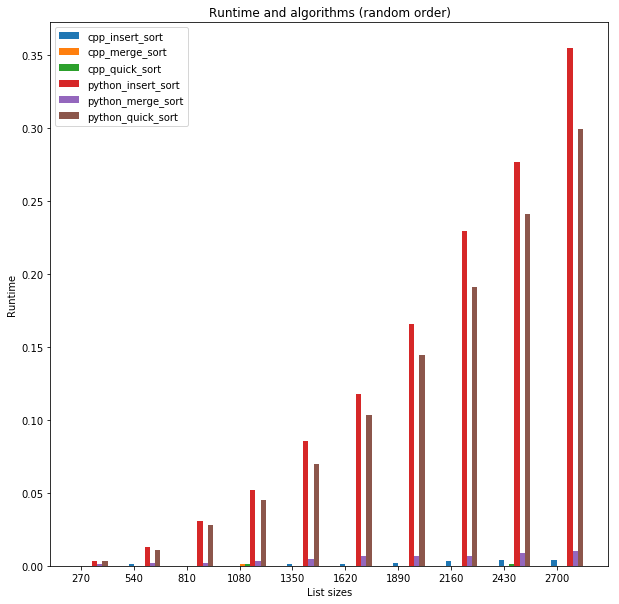

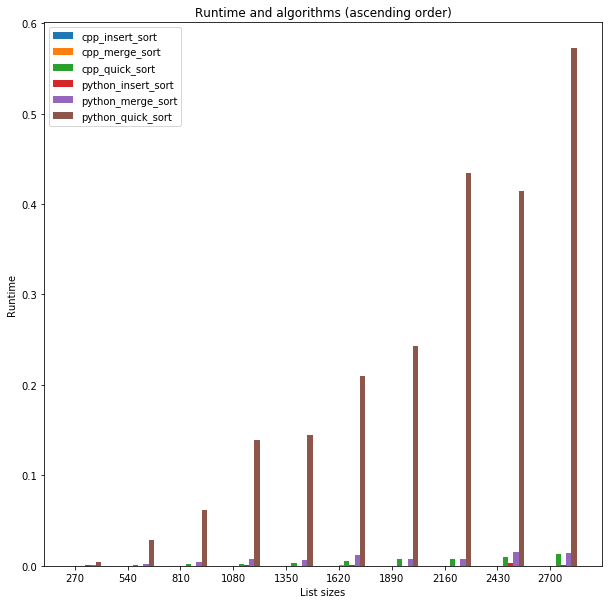

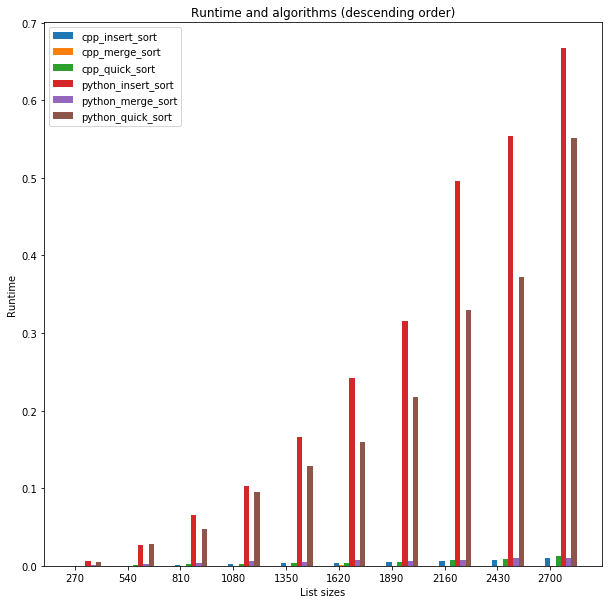

In [30]:
def main():
    ns = list(np.linspace(270, 2700, 10))
    ns = [int(i) for i in ns]
    
    for order_type in ["random","ascending","descending"]:
        mergesort_rt, insertsort_rt, quicksort_rt = ([] for i in range(3))
        print(order_type)
        for n in ns:
            print(n)
            n = int(n)
            # create and fill an array with random numbers
            #order_type = "random"
            a = fill_list(order_type, n)
            
            # call insert_sort and  calculate the time
            time = datetime.now()
            sorted_a = insert_sort(a)
            if not is_sorted(sorted_a):
                print("ERROR")
            t1 = round(timer(time),9)
    
            # call merge_sort and  calculate the time
            time = datetime.now()
            sorted_a = merge_sort(a)
            if not is_sorted(sorted_a):
                print("ERROR")
            t2 = round(timer(time),9)
    
            # call quicksort and  calculate the time
            time = datetime.now()
            #sorted_a = quicksort(a,0,len(a)-1)
            sorted_a = quicksort(a)
            if not is_sorted(sorted_a):
                print("ERROR")
            t3 = round(timer(time),9)
            
            insertsort_rt.append(t1)
            mergesort_rt.append(t2)
            quicksort_rt.append(t3)
            #print("%d %.2f %.2f %.2f" % (n, t1, t2, t3))
        algorithms_dict = {}
        algorithms_dict['python_insert_sort'] = insertsort_rt
        algorithms_dict['python_merge_sort'] = mergesort_rt
        algorithms_dict['python_quick_sort'] = quicksort_rt
        cpp_algorithms_dict = get_cpp_data(order_type)
        print(order_type)
        algorithms_dict = {**cpp_algorithms_dict, **algorithms_dict}
        save_figure(algorithms_dict, ns, order_type)
        #if order_type == "descending": return algorithms_dict

if __name__ == "__main__":
    results = main()

# 4.2
A função fill_list cria os arrays nas ordens indicadas a seguir: "random", "ascending", "descending". No 'main' eu gero as listas e salvo os gráficos com essas ordens.

# 4.3
A função fill_list cria os arrays nas ordens indicadas a seguir: "random", "ascending", "descending". No 'main' eu gero as listas e salvo os gráficos com essas ordens.